In [2]:
import pandas as pd
import numpy as np

In [16]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [35]:
from pandas.plotting import scatter_matrix


In [2]:
train_data = pd.read_csv('./data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

# Initial Exploration

In [4]:
train_data.head(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C
9,9,2615,D-penicillamine,15009,F,N,N,N,N,0.9,478.0,3.60,39.0,1758.0,171.00,140.0,234.0,10.6,2.0,C


In [5]:
train_data['Drug'].value_counts()

Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64

In [7]:
train_data['Sex'].value_counts()

Sex
F    7336
M     569
Name: count, dtype: int64

In [8]:
train_data['Ascites'].value_counts()

Ascites
N    7525
Y     380
Name: count, dtype: int64

In [9]:
train_data['Hepatomegaly'].value_counts()

Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

In [12]:
train_data['Spiders'].value_counts()

Spiders
N    5966
Y    1939
Name: count, dtype: int64

In [13]:
train_data['Edema'].value_counts()

Edema
N    7161
S     399
Y     345
Name: count, dtype: int64

In [15]:
train_data['Stage'].value_counts()

Stage
3.0    3153
4.0    2703
2.0    1652
1.0     397
Name: count, dtype: int64

In [16]:
train_data['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [11]:
list(train_data.columns)

['id',
 'N_Days',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Status']

# Split Data

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
X = train_data.drop(['Status'], axis=1)
y = train_data[['Status']]

In [17]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=84)
for train_index, test_index in sss.split(train_data, train_data[['Status']]):
    train_ds = train_data.iloc[train_index]
    test_ds = train_data.iloc[test_index]

In [18]:
print("Train ds {}".format(train_ds.shape[0]))
print("Test ds {}".format(test_ds.shape[0]))

Train ds 6324
Test ds 1581


In [19]:
train_ds.to_csv('./data/train_ds.csv', index=False)
test_ds.to_csv('./data/test_ds.csv', index=False)

# Data Exploration
Only consider the Train data `train_ds`

In [3]:
train_ds = pd.read_csv('./data/train_ds.csv')

In [4]:
train_ds.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,3926.602941,2033.032416,18382.428526,2.606199,351.783049,3.547051,83.154016,1812.296237,114.501061,115.604522,264.660816,10.623988,3.037002
std,2275.338141,1091.989192,3683.095889,3.844880,199.552027,0.344659,75.410333,1886.871375,48.680018,53.039847,86.958996,0.780170,0.864297
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1965.500000,1234.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.950000,84.000000,210.000000,10.000000,2.000000
50%,3910.500000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5885.250000,2689.000000,20684.000000,3.000000,392.000000,3.770000,102.000000,1860.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


array([[<Axes: xlabel='N_Days', ylabel='N_Days'>,
        <Axes: xlabel='Age', ylabel='N_Days'>,
        <Axes: xlabel='Bilirubin', ylabel='N_Days'>,
        <Axes: xlabel='Cholesterol', ylabel='N_Days'>,
        <Axes: xlabel='Albumin', ylabel='N_Days'>,
        <Axes: xlabel='Copper', ylabel='N_Days'>,
        <Axes: xlabel='Alk_Phos', ylabel='N_Days'>,
        <Axes: xlabel='SGOT', ylabel='N_Days'>,
        <Axes: xlabel='Tryglicerides', ylabel='N_Days'>,
        <Axes: xlabel='Platelets', ylabel='N_Days'>,
        <Axes: xlabel='Prothrombin', ylabel='N_Days'>,
        <Axes: xlabel='Stage', ylabel='N_Days'>],
       [<Axes: xlabel='N_Days', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Bilirubin', ylabel='Age'>,
        <Axes: xlabel='Cholesterol', ylabel='Age'>,
        <Axes: xlabel='Albumin', ylabel='Age'>,
        <Axes: xlabel='Copper', ylabel='Age'>,
        <Axes: xlabel='Alk_Phos', ylabel='Age'>,
        <Axes: xlabel='SGOT', ylabel='Age'

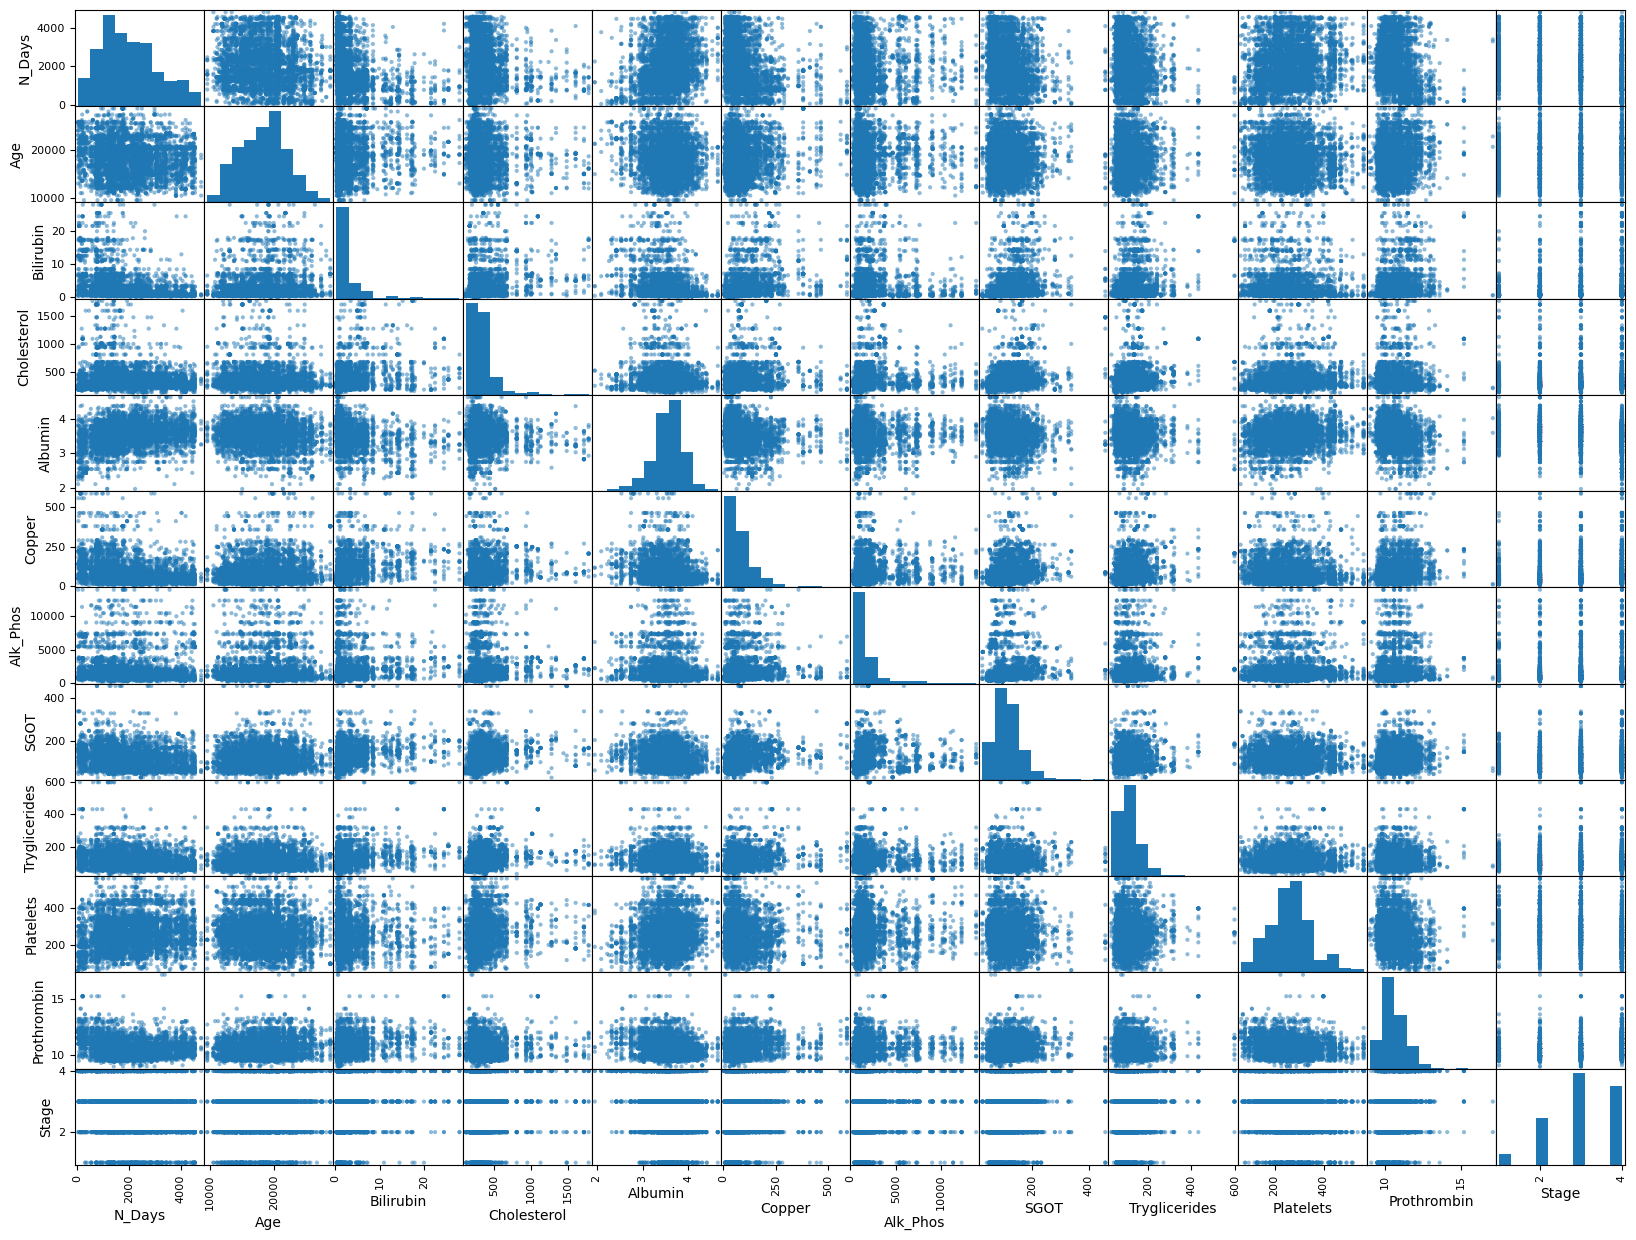

In [36]:
att = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
scatter_matrix(train_ds[att], figsize=(20, 15))

## One-hot Encoding

In [6]:
train_1h_ds = pd.get_dummies(train_ds,
                             columns=['Drug', 'Sex', 'Ascites',
                                      'Hepatomegaly', 'Spiders', 'Edema'],
                            dtype=np.uint8)

In [8]:
print(list(train_1h_ds.columns))

['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']


In [9]:
train_1h_ds.drop(['Drug_D-penicillamine', 'Sex_M', 'Ascites_N', 'Hepatomegaly_N', 'Spiders_N'], axis=1, inplace=True)

In [10]:
train_1h_ds

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Stage,Status,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,7532,2357,18176,0.5,299.0,3.50,44.0,1119.0,86.80,46.0,...,3.0,C,1,1,0,1,0,1,0,0
1,7798,3170,18731,0.7,210.0,3.26,82.0,1592.0,218.55,113.0,...,3.0,D,1,1,0,0,0,1,0,0
2,6355,2224,16463,0.5,298.0,3.77,39.0,824.0,80.60,83.0,...,2.0,C,1,1,0,0,0,1,0,0
3,2926,1481,18302,1.0,219.0,3.85,67.0,640.0,145.00,108.0,...,3.0,C,0,1,0,1,0,1,0,0
4,2398,1978,20708,0.5,223.0,3.70,39.0,884.0,75.95,104.0,...,2.0,C,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,4622,1216,20597,0.8,280.0,4.08,38.0,1072.0,97.65,146.0,...,3.0,C,1,1,0,1,0,1,0,0
6320,4439,1614,17664,2.5,277.0,3.70,444.0,1787.0,130.20,85.0,...,1.0,C,0,1,0,0,0,1,0,0
6321,2754,1302,19258,0.8,340.0,3.77,52.0,1303.0,93.00,133.0,...,3.0,C,1,1,0,0,0,1,0,0
6322,1935,1882,12109,0.9,396.0,3.77,43.0,1882.0,133.30,133.0,...,2.0,C,1,1,0,0,0,1,0,0


In [11]:
train_1h_ds.drop(['id'], axis=1, inplace=True)

In [12]:
train_1h_ds.to_csv('./data/train_ds_processed.csv', index=False)

## Clustering

In [13]:
train_p_ds = pd.read_csv('./data/train_ds_processed.csv')
train_p_ds.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,2033.032416,18382.428526,2.606199,351.783049,3.547051,83.154016,1812.296237,114.501061,115.604522,264.660816,10.623988,3.037002,0.508697,0.925522,0.047596,0.515022,0.243517,0.906230,0.050601,0.043169
std,1091.989192,3683.095889,3.844880,199.552027,0.344659,75.410333,1886.871375,48.680018,53.039847,86.958996,0.780170,0.864297,0.499964,0.262568,0.212928,0.499814,0.429238,0.291531,0.219199,0.203253
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.950000,84.000000,210.000000,10.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2689.000000,20684.000000,3.000000,392.000000,3.770000,102.000000,1860.000000,137.950000,139.000000,316.000000,11.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
train_p_ds['Status'].value_counts()

Status
C     3972
D     2132
CL     220
Name: count, dtype: int64

### No Scaling

In [65]:
train_X = train_p_ds.drop(['Status'], axis=1)

In [17]:
cluster_range = range(1,10)
cluster_wss = []

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/li

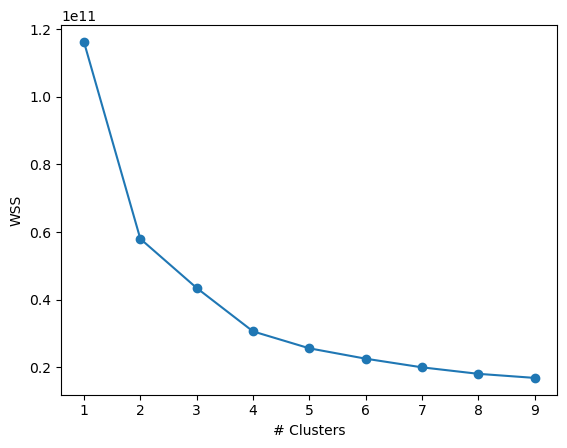

In [18]:
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(train_X)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [23]:
km = KMeans(n_clusters=4)
km.fit(train_X)

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
train_X['predict'] = km.predict(train_X)

In [25]:
train_X_mean = train_X.groupby(['predict']).agg('mean')
train_X_mean

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y
predict,,,,,,,,,,,,,,,,,,,,
0,2277.973558,19310.615385,2.851202,337.206731,3.521346,94.129808,7772.102885,107.679255,117.584135,265.903846,10.775481,3.108173,0.451923,0.927885,0.084135,0.596154,0.293269,0.841346,0.072115,0.086538
1,2150.498642,19020.424137,2.455763,344.765231,3.566422,78.224680,1321.314629,111.779697,113.846333,266.132712,10.627319,3.034924,0.525805,0.931704,0.036088,0.517656,0.235157,0.919286,0.053551,0.027163
2,1576.186728,23382.402778,3.451389,348.832562,3.462762,97.577160,1430.999228,118.630008,119.658179,247.196759,10.786651,3.235340,0.422840,0.875000,0.103395,0.620370,0.297840,0.838735,0.070988,0.090278
3,2125.153317,14200.508600,2.208354,365.528747,3.581455,77.967076,1458.557150,116.712221,114.844717,273.664865,10.485209,2.898771,0.553317,0.949386,0.019165,0.428010,0.209337,0.945946,0.029484,0.024570


In [30]:
label_encoder = preprocessing.LabelEncoder()

In [31]:
train_X['label'] = label_encoder.fit_transform(train_p_ds['Status'])

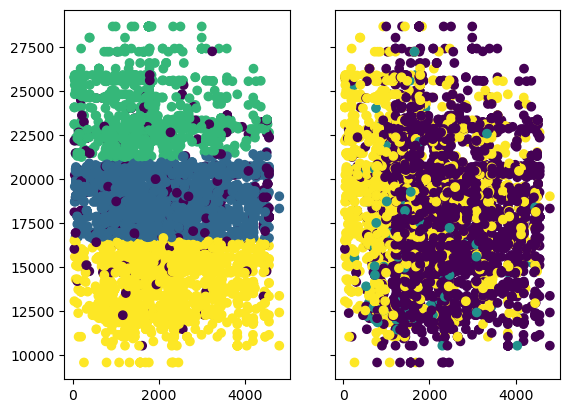

In [32]:
f, (pred, label) = plt.subplots(1, 2, sharey=True)
pred.scatter(train_X['N_Days'], train_X['Age'], c=train_X['predict'])
label.scatter(train_X['N_Days'], train_X['Age'], c=train_X['label'])

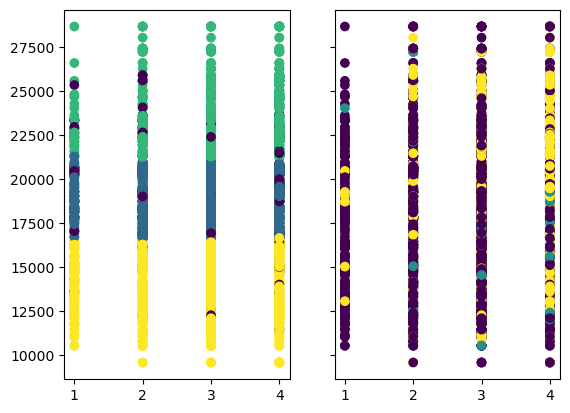

In [34]:
f, (pred, label) = plt.subplots(1, 2, sharey=True)
pred.scatter(train_X['Stage'], train_X['Age'], c=train_X['predict'])
label.scatter(train_X['Stage'], train_X['Age'], c=train_X['label'])

### Standard Scaler

In [66]:
train_std_X = train_p_ds.drop(['Status'], axis=1)

In [67]:
print(list(train_std_X.columns))

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Drug_Placebo', 'Sex_F', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']


In [59]:
encoded_ds = train_std_X[['Stage', 'Drug_Placebo', 'Sex_F', 'Ascites_Y',
                        'Hepatomegaly_Y', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']]

In [68]:
train_std_X.drop(['Stage', 'Drug_Placebo', 'Sex_F', 'Ascites_Y',
                                  'Hepatomegaly_Y', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'], axis=1, inplace=True)

In [69]:
std_scaler = StandardScaler()

In [70]:
std_scaled_data = std_scaler.fit_transform(train_std_X)

In [71]:
train_std_X = pd.DataFrame(std_scaled_data, index=train_std_X.index, columns=train_std_X.columns)
train_std_X.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03
mean,6.741392e-18,2.308927e-16,7.190818e-17,-1.292100e-16,-8.117760e-16,-1.910061e-17,1.511195e-16,1.853883e-17,-8.539097e-17,-2.775206e-16,1.051095e-15
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-1.824368e+00,-2.385255e+00,-5.998577e-01,-1.161609e+00,-4.605067e+00,-1.049727e+00,-8.073771e-01,-1.810970e+00,-1.557528e+00,-2.330717e+00,-2.081747e+00
25%,-7.317798e-01,-7.625787e-01,-4.958150e-01,-5.201213e-01,-5.717729e-01,-5.855631e-01,-5.243465e-01,-7.919904e-01,-5.959109e-01,-6.286312e-01,-7.998734e-01
50%,-1.850278e-01,8.976079e-02,-3.917723e-01,-2.695402e-01,9.560673e-02,-2.672792e-01,-3.345995e-01,-1.232854e-01,-2.188061e-01,3.900814e-03,-3.074955e-02
75%,6.007564e-01,6.249507e-01,1.024304e-01,2.015521e-01,6.469203e-01,2.499322e-01,2.528394e-02,4.817335e-01,4.411274e-01,5.904305e-01,4.819997e-01
max,2.529499e+00,2.787976e+00,6.605097e+00,7.132624e+00,3.171356e+00,6.695182e+00,6.386793e+00,7.041412e+00,9.095683e+00,3.431074e+00,8.301426e+00


In [72]:
train_std_X = pd.concat([train_std_X,encoded_ds], axis=1)
train_std_X.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y
count,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,6.741392e-18,2.308927e-16,7.190818e-17,-1.292100e-16,-8.117760e-16,-1.910061e-17,1.511195e-16,1.853883e-17,-8.539097e-17,-2.775206e-16,1.051095e-15,3.037002,0.508697,0.925522,0.047596,0.515022,0.243517,0.906230,0.050601,0.043169
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,0.864297,0.499964,0.262568,0.212928,0.499814,0.429238,0.291531,0.219199,0.203253
min,-1.824368e+00,-2.385255e+00,-5.998577e-01,-1.161609e+00,-4.605067e+00,-1.049727e+00,-8.073771e-01,-1.810970e+00,-1.557528e+00,-2.330717e+00,-2.081747e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.317798e-01,-7.625787e-01,-4.958150e-01,-5.201213e-01,-5.717729e-01,-5.855631e-01,-5.243465e-01,-7.919904e-01,-5.959109e-01,-6.286312e-01,-7.998734e-01,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.850278e-01,8.976079e-02,-3.917723e-01,-2.695402e-01,9.560673e-02,-2.672792e-01,-3.345995e-01,-1.232854e-01,-2.188061e-01,3.900814e-03,-3.074955e-02,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.007564e-01,6.249507e-01,1.024304e-01,2.015521e-01,6.469203e-01,2.499322e-01,2.528394e-02,4.817335e-01,4.411274e-01,5.904305e-01,4.819997e-01,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.529499e+00,2.787976e+00,6.605097e+00,7.132624e+00,3.171356e+00,6.695182e+00,6.386793e+00,7.041412e+00,9.095683e+00,3.431074e+00,8.301426e+00,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
cluster_range = range(1,10)
cluster_wss = []

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/li

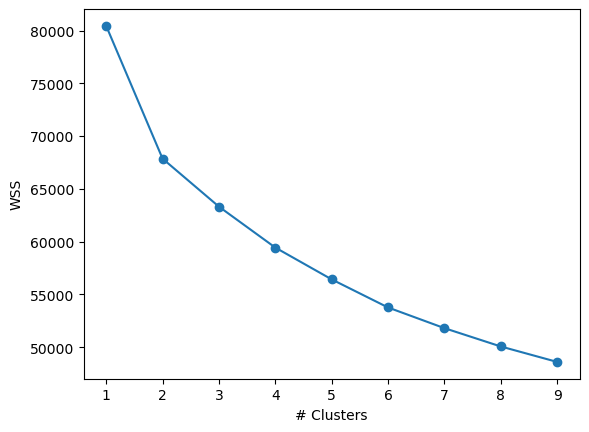

In [75]:
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(train_std_X)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [76]:
km = KMeans(n_clusters=3)
km.fit(train_std_X)

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [77]:
train_std_X['predict'] = km.predict(train_std_X)

In [78]:
train_std_X_mean = train_std_X.groupby(['predict']).agg('mean')
train_std_X_mean

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_F,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_N,Edema_S,Edema_Y
predict,,,,,,,,,,,,,,,,,,,,
0,-0.874650,0.267714,2.189352,1.578649,-0.820286,1.400742,0.381671,1.118291,1.128449,-0.028043,0.631718,3.345257,0.517885,0.892691,0.245723,0.842924,0.458787,0.713841,0.099533,0.186625
1,0.404047,-0.184449,-0.391033,-0.212546,0.364398,-0.404267,-0.182694,-0.352635,-0.190209,0.276414,-0.389814,2.688525,0.506284,0.956011,0.000820,0.287158,0.100546,0.984426,0.015027,0.000546
2,-0.453446,0.248858,0.011593,-0.117344,-0.398937,0.286463,0.209423,0.282821,-0.014561,-0.491660,0.504961,3.570015,0.510143,0.880752,0.069273,0.823355,0.433944,0.825829,0.099456,0.074715


In [79]:
label_encoder = preprocessing.LabelEncoder()
train_std_X['label'] = label_encoder.fit_transform(train_p_ds['Status'])

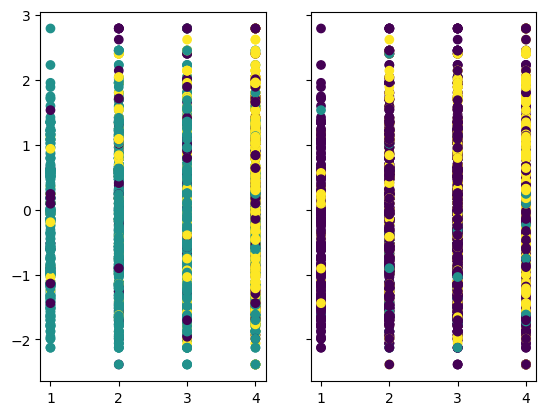

In [80]:
f, (pred, label) = plt.subplots(1, 2, sharey=True)
pred.scatter(train_std_X['Stage'], train_std_X['Age'], c=train_std_X['predict'])
label.scatter(train_std_X['Stage'], train_std_X['Age'], c=train_std_X['label'])

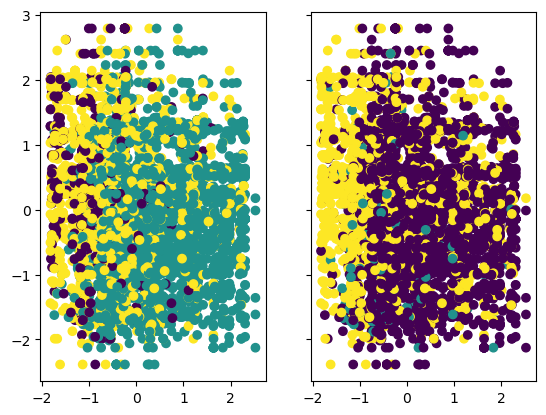

In [81]:
f, (pred, label) = plt.subplots(1, 2, sharey=True)
pred.scatter(train_std_X['N_Days'], train_std_X['Age'], c=train_std_X['predict'])
label.scatter(train_std_X['N_Days'], train_std_X['Age'], c=train_std_X['label'])

In [82]:
train_std_X['label'].value_counts()

label
0    3972
2    2132
1     220
Name: count, dtype: int64

In [83]:
train_std_X['predict'].value_counts()

predict
1    3660
2    2021
0     643
Name: count, dtype: int64

In [86]:
def match_label_pred(label, pred):
    if label == 0 and pred == 1:
        return 1
    elif label == 2 and pred == 2:
        return 1
    elif label == 1 and pred == 0:
        return 1
    else:
        return 0

In [90]:
train_std_X['match'] = train_std_X.apply(lambda X: match_label_pred(X['label'], X['predict']), axis=1)
train_std_X['match'].value_counts()

match
1    4370
0    1954
Name: count, dtype: int64

### Conclusion for Clustering:
Using K-Means, compare the algorithm's prediction with the ground truth.  
Using Standard Normalization, with 3 clusters, achieve an unsupervised accuracy of about 70% (unsupervised prediction to the ground truth).  
This result can be used as the baseline for the supervised learning.

## Save Preprocess Dataset
One-hot encoding categorical columns  
Standard scaling numerical columns  
Leave the `Stage` column unchanged

In [92]:
processed_ds = train_std_X.drop(['label', 'predict', 'match'], axis=1)
processed_ds['Status'] = train_p_ds['Status']
processed_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_Days          6324 non-null   float64
 1   Age             6324 non-null   float64
 2   Bilirubin       6324 non-null   float64
 3   Cholesterol     6324 non-null   float64
 4   Albumin         6324 non-null   float64
 5   Copper          6324 non-null   float64
 6   Alk_Phos        6324 non-null   float64
 7   SGOT            6324 non-null   float64
 8   Tryglicerides   6324 non-null   float64
 9   Platelets       6324 non-null   float64
 10  Prothrombin     6324 non-null   float64
 11  Stage           6324 non-null   float64
 12  Drug_Placebo    6324 non-null   int64  
 13  Sex_F           6324 non-null   int64  
 14  Ascites_Y       6324 non-null   int64  
 15  Hepatomegaly_Y  6324 non-null   int64  
 16  Spiders_Y       6324 non-null   int64  
 17  Edema_N         6324 non-null   i

Overwrite the train_ds_processed.csv  
This version is the finalized dataset for training

In [93]:
processed_ds.to_csv('./data/train_ds_processed.csv', index=False)